# Decision Tree Classifier with Employee Attrition Dataset

In this notebook, we will build a decision tree classifier using the scikit-learn library. We will use a hypothetical employee attrition dataset for this example.

## Import Libraries
First, let's import the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.calibration import LabelEncoder
from sklearn.tree import plot_tree


## Load and Explore the Dataset
Next, we will load the employee attrition dataset ('employee_attrition_small.csv') and explore its contents.

In [2]:
df = pd.read_csv('employee_attrition_small.csv')
print(df.head())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

  EducationField  Gender  HourlyRate                JobRole  JobSatisfaction  \
0  Life Sciences  Female          94        Sales Executive                4   
1  Life Sciences    Male          61     Research Scientist                2   
2          Other    Male          92  Laboratory Technician                3   
3  Life Sciences  Female          56     Research Scientist                3   
4        Medical    Male          40  Laboratory Technician                2   

  MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked OverTime  

## Preprocess the Data
We need to preprocess the data, including handling categorical variables and missing values.

In [3]:
# Check for missing values
print(df.isnull().sum()) #prints 0

# assign features to X and Attrition as label, y
X = df.drop(columns = ['Attrition'], axis = 1)
y = df['Attrition']

Age                   0
Attrition             0
BusinessTravel        0
DailyRate             0
Department            0
EducationField        0
Gender                0
HourlyRate            0
JobRole               0
JobSatisfaction       0
MaritalStatus         0
MonthlyIncome         0
MonthlyRate           0
NumCompaniesWorked    0
OverTime              0
TotalWorkingYears     0
dtype: int64


In [ ]:
# encode 
labelEncoder = LabelEncoder()
categoricalCols = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

for col in categoricalCols: 
    X[col] = labelEncoder.fit_transform(df[col])

y = labelEncoder.fit_transform(df['Attrition'])


   Age  BusinessTravel  DailyRate  Department  EducationField  Gender  \
0   41               2       1102           2               1       0   
1   49               1        279           1               1       1   
2   37               2       1373           1               4       1   
3   33               1       1392           1               1       0   
4   27               2        591           1               3       1   

   HourlyRate  JobRole  JobSatisfaction  MaritalStatus  MonthlyIncome  \
0          94        7                4              2           5993   
1          61        6                2              1           5130   
2          92        2                3              2           2090   
3          56        6                3              1           2909   
4          40        2                2              1           3468   

   MonthlyRate  NumCompaniesWorked  OverTime  TotalWorkingYears  
0        19479                   8         1            

## Split the Dataset
We will split the dataset into training and testing sets.

In [5]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


## Train and evaluate the Decision Tree Model
Please not that the maximum depth shouldn't be greater than 3

In [6]:
# Create and train the decision tree classifier
dt_classifier = DecisionTreeClassifier(max_depth = 3, random_state = 42)
# train the dt classifier with training sets
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_classifier.predict(X_test)

# Calculate the accuracy of the decision tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Decision Tree Accuracy: {accuracy_dt*100:.3f}%')


Decision Tree Accuracy: 86.735%


# Visualize the Decision Tree

We can visualize the decision tree to better understand the model

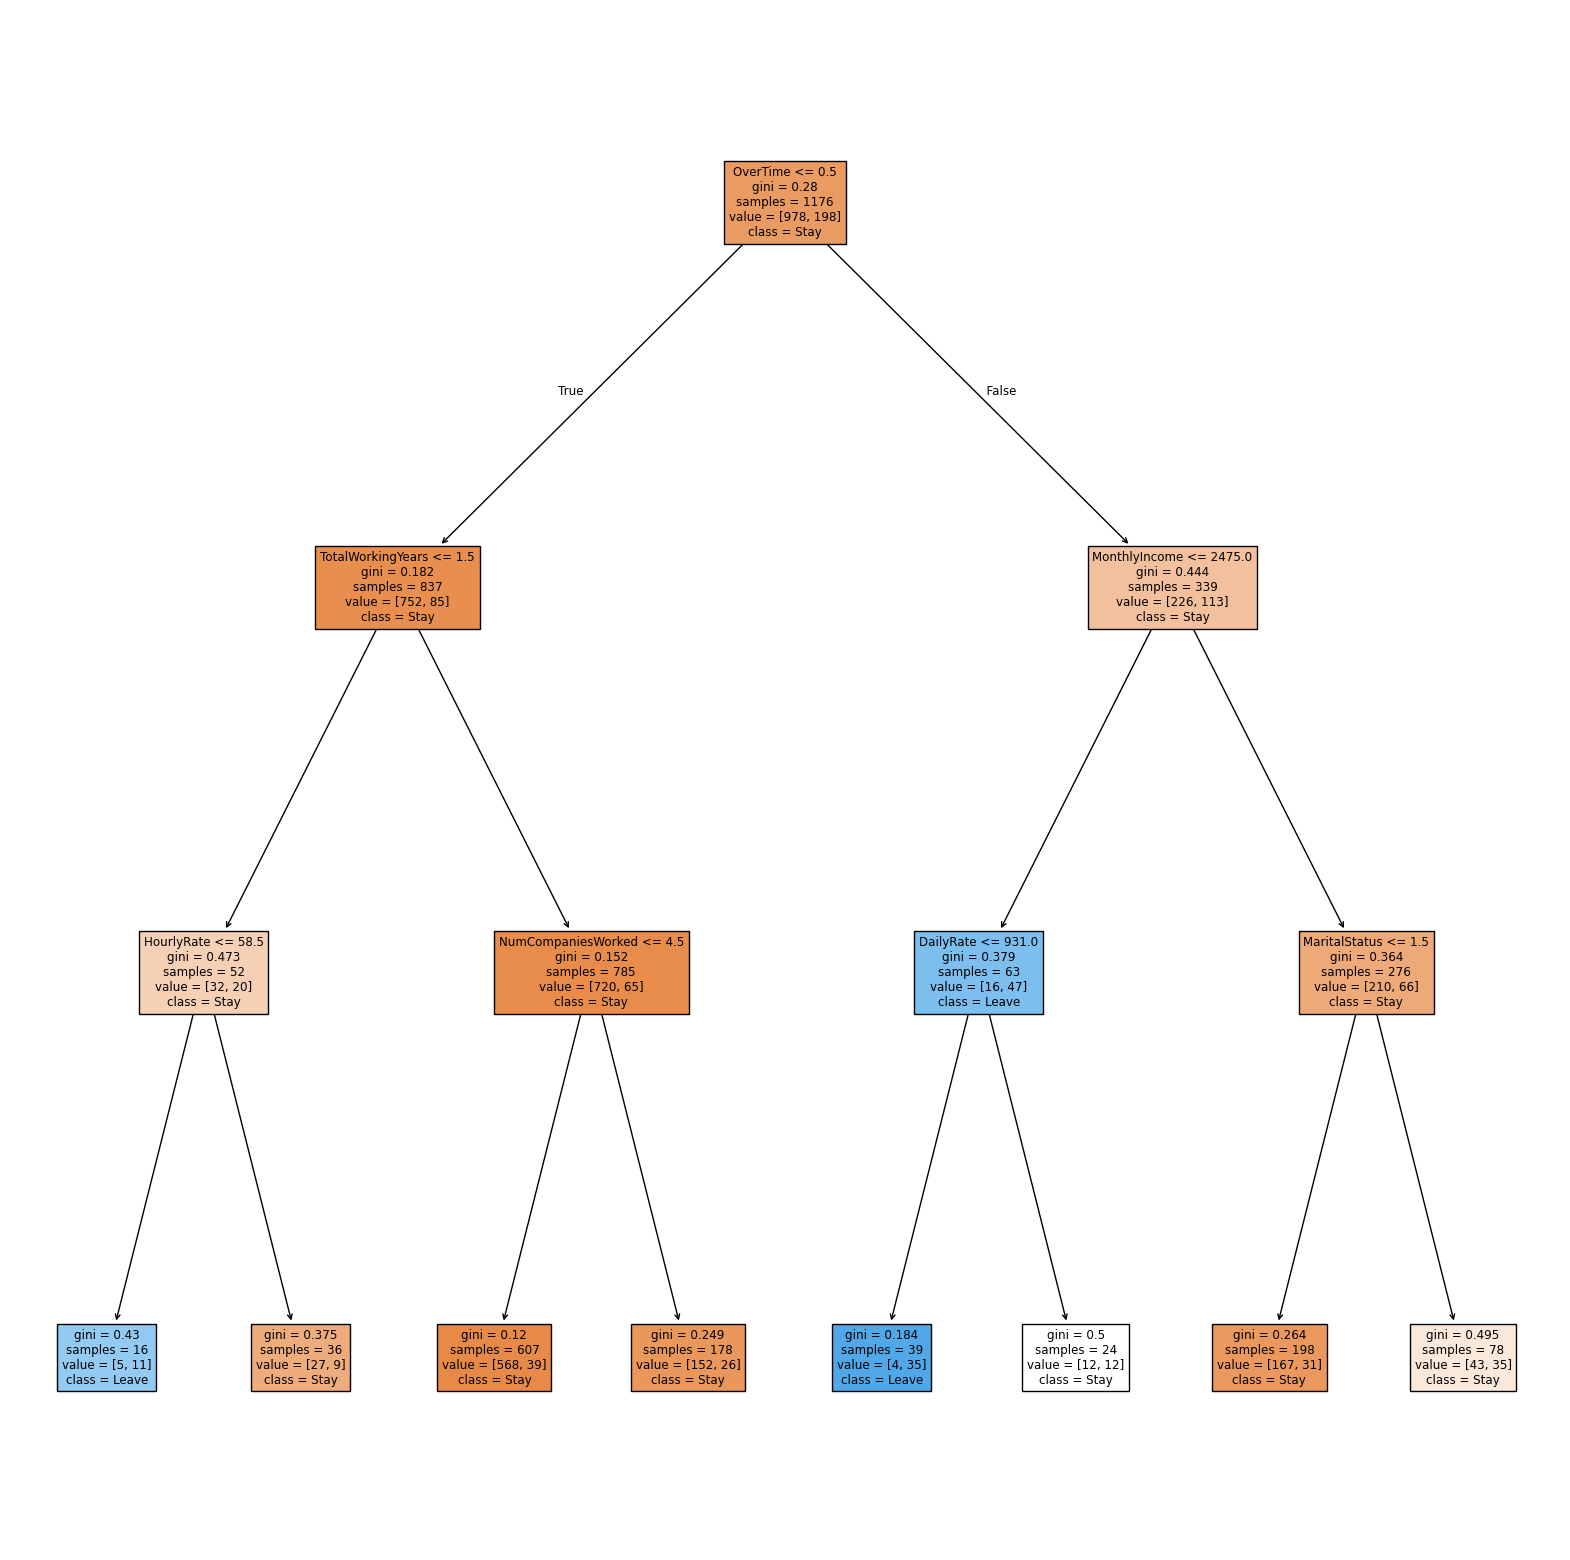

In [7]:
plt.figure(figsize = (20, 20))
plot_tree(dt_classifier, filled=True, feature_names = X.columns, class_names = ['Stay','Leave'])
plt.show()